In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import random
from pprint import pprint
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import timeit
import matplotlib.pyplot as plt
from dtreefunctions import decision_tree_algorithm,decision_tree_predictions,train_test_split
from randomforestfunctions import random_forest_algorithm,random_forest_predictions

In [2]:
df = pd.read_csv("breast-cancer.csv",skipinitialspace=True)
df["label"] = df.Class
df = df.drop("Class", axis=1)

column_names = []
for column in df.columns:
    name = column.replace("-", "_")
    column_names.append(name)
df.columns = column_names


In [3]:
random.seed(0)
train_df, test_df = train_test_split(df, test_size=0.2)


In [4]:
forest = random_forest_algorithm(train_df, n_trees=60, n_bootstrap=20, n_features=5, dt_max_depth=4)


In [5]:
predictions = random_forest_predictions(test_df, forest)
accuracy_score(predictions, test_df.label)

0.7017543859649122

In [6]:
test_df.head()

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,label
197,40-49,premeno,Oct-14,0-2,no,2,left,left_low,yes,no-recurrence-events
215,40-49,ge40,20-24,0-2,no,2,right,left_up,no,recurrence-events
20,50-59,ge40,40-44,0-2,no,2,left,left_low,no,no-recurrence-events
132,40-49,premeno,30-34,06-Aug,no,2,left,left_up,no,no-recurrence-events
261,40-49,ge40,25-29,Dec-14,yes,3,left,right_low,yes,recurrence-events


In [12]:
import timeit
tic=timeit.default_timer()
Accuracy = []
x = range(1,13)
for i in x:
    forest = random_forest_algorithm(train_df, n_trees=60, n_bootstrap=50, n_features=i, dt_max_depth=4)
    predictions = random_forest_predictions(test_df, forest)
    Accuracy.append(accuracy_score(predictions, test_df.label))

toc=timeit.default_timer()
print(toc - tic)



14.39681643700169


In [15]:
index_accuracies = np.arange(1,21)
column_name=["Accuracy"]
df_result = pd.DataFrame({'Accuracies':Accuracy})

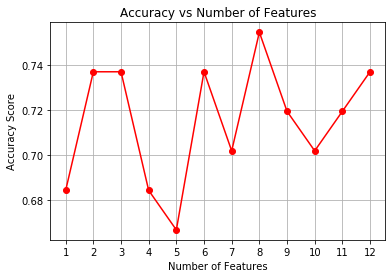

In [17]:
plt.plot(x,df_result["Accuracies"],'r',marker='o') # 'r' is the color red
plt.xlabel('Number of Features')
plt.ylabel('Accuracy Score')
plt.title('Accuracy vs Number of Features')
plt.grid(True)
plt.xticks(x)
plt.show()